![title](img/NumPy.jpeg)

# Programming for Data Analysis Practical Assignment 2018


## Create a Jupyter notebook explaining the use of the numpy.random package in Python. Including detailed explainations of at lease five of the distributions provided for the package. 

## There are four distinct tasks to be carried out:


### 1. Explain the overall purpose of the package.

### 2. Explain the use of the "Simple random data" and Permutations" functions.

### 3. Explain the use and purpose of at least five "Distributions" functions.

### 4. Explain the use of seeds in generating pseudorandom numbers.

In [55]:
# Import the NumPy package for array operations and matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Task 1
#### Explain the overall purpose of the package

Although NumPy, short for Numerical Python, does not provide modelling or scientific functionality it is a powerful tool package for efficient multidimensional array operations. Enabling reading and writing arithmatic operations on large arrays of data without having to write loops. It includeS a C Application Programming Interface (API) that connects it with C, C++ and FORTRAN libraries. Features include useful linear algebra, Fourier transform, and random number capabilities.  

NumPy can create random numbers based on different types of statistical distribution. Random numbers have many important applications, from the crytography used to keep things like banking transactions secure to the selection of samples from population for statistical analysis.

numpy.random is a routine docstring in the NumPy package for the generation of pseudorandom numbers. The generation of pseudorandom numbers is based on the Mersenne Twister: a 623-dimensionally equidistributed uniform pseudorandom number generator (also known as PRNG's). 

The Mersenne Twister was first proposed in 1998 by Makato Matsumoto and Takuji Nishimura of Keio University to solve the problem of generating 'high-quality' random numbers with computers, it is now the basis of how the NumPy package creates pseudorandom numbers. It is important to note that PRNG's are not truly random numbers, they are based on complex algorithms such as MT19937. Seeds are used to create a vector a starting point within the algorithm, from which the random numbers are generated. A seed may be automatically selected based on a computer system's random number generator device or its clock. A seed can also be set by the user, and if the same seed is used in the future the same set of random numbers is created.

### Task 2
#### Explain the use of "Simple random data" and "Permutations" functions

#### Simple random data

The NumPy v1.15 manual lists ten functions for Random Sampling of Simple random data, however four are essentially duplicates that return random floats in the half-open interval. 

In [21]:
# Create a three dimensional random array based on a uniform distribution
np.random.randn(3,2, 3)

array([[[-2.08130969, -0.10841098, -1.29310315],
        [-1.39540962, -1.02298297, -0.0631097 ]],

       [[ 0.21364029, -1.24276099,  0.90256149],
        [-0.84224077, -0.01810908,  1.61174665]],

       [[ 0.01790478, -2.73273283,  1.00121423],
        [-1.26989436, -0.7946316 ,  0.97507845]]])

<function matplotlib.pyplot.show(*args, **kw)>

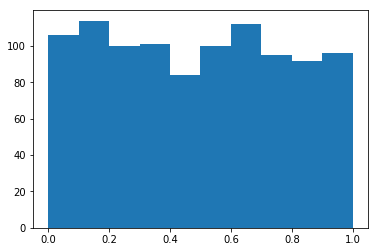

In [22]:
plt.hist(np.random.rand(1000))
plt.show


#### The permutations function randomly arranges a series of numbers

#### This can be done either by specifying a range

In [5]:
# Arrange the numbers from 0 to 49 in a random order
np.random.permutation(50)

array([ 0, 13, 28, 43,  2, 24, 36, 15, 25,  7, 17, 30,  6, 33,  9, 27, 21,
       19, 47,  4, 39, 45, 20,  5, 46,  8,  1, 18, 12, 32, 34, 38, 49, 26,
       16, 11, 14, 40, 41, 35,  3, 29, 44, 48, 22, 42, 10, 37, 23, 31])

#### Or by passing a list

In [6]:
# Arrange a list of defined numbers in a random order
np.random.permutation([10, 2, 2, 3, 4, 5, 2, 2])

array([ 3,  2,  2, 10,  4,  5,  2,  2])

### Task 3
#### Explain the use and purpose of at least 5 "Distributions" functions

#### Binomial distributions

Binomial distributions are the result of repeated trials were there are two possible outcomes, typically termed either success or failure. The probability of success is constant and the trials are independent, in such the outcome of one or more of the trails do not effect one another. Coin tosses are often used to illustate binomial experiments as there are two possible outcomes, either heads or tails. If the desired outcome is heads, and the coin is unbiased, the probability of tossing the coin and successfully obtaining a heads is 50%. 

In [81]:
"""numpy.random.binomial(n, p, size=None) n = number of trials, p = probability of successfull outcomes, 
size = times the trials are repeated"""

# Toss a coin ten times, the binomial function randomly selects how many times 'heads' is returned.

np.random.binomial(10, 0.5)

4

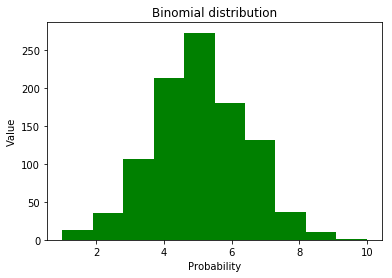

In [93]:
plt.hist(np.random.binomial(10, 0.5, 1000), color='g')
plt.xlabel('Outcome of each trial')
plt.ylabel('Value')
plt.title("Binomial distribution")
plt.show()

#### A chisquare distribution

The Chi-square test is intended to test how likely it is that an observed distribution is due to chance. It is also called a "goodness of fit" statistic, because it measures how well the observed distribution of data fits with the distribution that is expected if the variables are independent. 

A Chi-square test is designed to analyze categorical data. That means that the data has been counted and divided into categories. It will not work with parametric or continuous data (such as height in inches). For example, if you want to test whether attending class influences how students perform on an exam, using test scores (from 0-100) as data would not be appropriate for a Chi-square test. However, arranging students into the categories "Pass" and "Fail" would. Additionally, the data in a Chi-square grid should not be in the form of percentages, or anything other than frequency (count) data. Thus, by dividing a class of 54 into groups according to whether they attended class and whether they passed the exam, you might construct a data set like this: 


In [10]:
np.random.chisquare(10000, 1000000)

array([10137.33672393, 10118.2065938 , 10066.96279541, ...,
        9982.05733674,  9979.307153  , 10131.43986577])

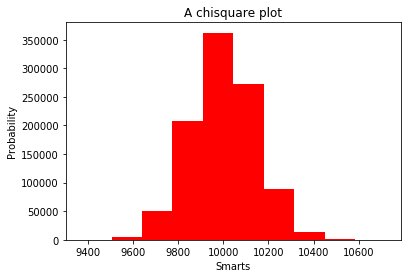

In [11]:
plt.hist(np.random.chisquare(10000, 1000000), color='r')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title("A chisquare plot")
plt.show()

#### A normal distribution

In [12]:
np.random.normal(loc=10, scale=1.0, size=10)

array([10.26345943, 12.11314967, 10.25735781, 10.80407073, 10.53854328,
       10.58753638, 10.16778637, 11.36140219, 10.60898583, 10.29577574])

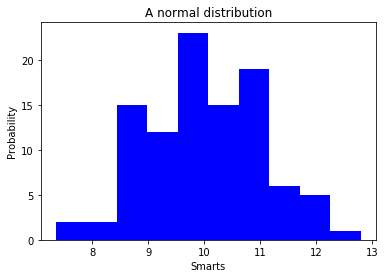

In [13]:
plt.hist(np.random.normal(loc=10, scale=1.0, size=100), color='b')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title("A normal distribution")
plt.show()

#### A pareto distribution

In [14]:
np.random.pareto(2, size=10)

array([4.56178923e-01, 3.82534480e-01, 8.87931651e-02, 7.28723836e-02,
       7.52059187e-02, 7.81089624e-01, 4.54525862e-05, 1.31752039e+00,
       1.37355344e-01, 1.96852105e-01])

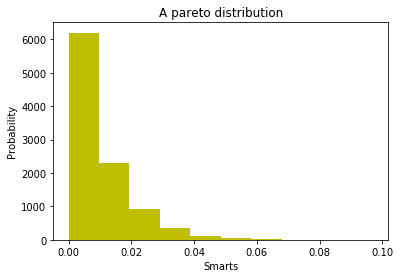

In [15]:
plt.hist(np.random.pareto(100, size=10000), color='y')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title("A pareto distribution")
plt.show()

In [16]:
np.random.uniform(low=0.0, high=1.0, size=10)

array([0.97253016, 0.04162865, 0.64420065, 0.94551214, 0.18129678,
       0.20333198, 0.02027527, 0.05507464, 0.07355477, 0.89504269])

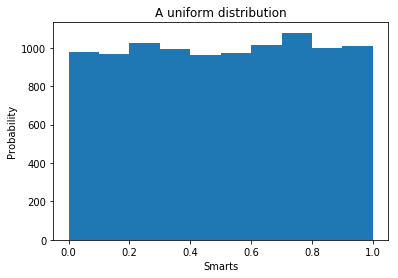

In [17]:
plt.hist(np.random.uniform(low=0.0, high=1.0, size=10000))
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title("A uniform distribution")
plt.show()

### Task 4

#### Seeding

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


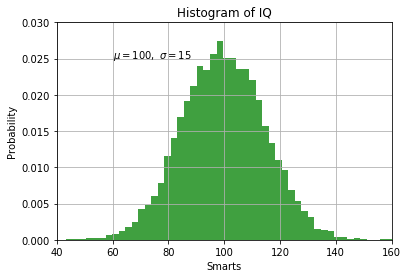

In [18]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()